# Data Science Project: Credit Card Fraud Detection
## Max Warkotsch


### Table of Contents
<a href='#section 0'>Project Description</a>

1. <a href='#section 1'>Data Exploration</a>
2. <a href='#section 2'>Data Manipulation</a>
3. <a href='#section 3'>Data Analysis / Modeling</a>
4. <a href='#section 4'>Executive Summary</a>
5. <a href='#section 5'>References</a>

## Project Description <a id='section 0'></a>

Welcome to my Data Science project for the Credit Card Fraud Detection. In this notebook I walked my way through the fraud detection machine learning with the help of lecture material and some tutorials where I got the most ideas from. For each step there is a short explanation followed by some lines of code. The references used are stated at the end of the notebook.


### Step 1: Preparation

It is important to load all necessary packages before starting with running the other code chunks.
Here we go: Underneath all packages are listed. Run the cell to load them.

* pandas: for data manipulation 
* numpy: for scientific computing 
* matplotlib: for plotting
* seaborn: for statistical data visualization
* sklearn: for machine learning algorithms

In [ ]:
# THIS CELL MUST BE RUN
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# data normalization
from sklearn.preprocessing import StandardScaler

# split in training and test set
from sklearn.model_selection import train_test_split

# ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# performance evaluation with confusion matrix, accuracy and f1 score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

print("Done")

## 1. Data Exploration <a id='section 1'></a>

### Data Import
At first we will start with importing our data - **to save space on kaggle we just use the already existing dataset from another kernel**.
The time feature is being deleted as we will not use it later on for our ML algorithms as they will work mainly with the PCAs from V1 -- V28 and the Amount feature. 


### First couple of data points
As next step we have a look how the head of the data looks like (it's beautiful you will see).

In [ ]:
df = pd.read_csv("../input/creditcard-fraud-detection/creditcard.csv")

# deleting the time axis as we will not use it for our ML models as it is not as relevant as the PCA features
df.drop('Time', axis = 1, inplace = True)

df.head()

In [ ]:
# histogram
df.hist(figsize = (20,40))
plt.show()

### Showing number of fraudulent cases
Now we will have a look how many fraudulent cases are there, how many non-fraudulent, how many at all and what is the ratio between fraudulent and non-fraudulent cases. As we can see than is that the ration between fraudulent and non-fraudulent cases is pretty small.

In [ ]:
# Number of all cases
cases = len(df)
# Number of fraud cases
fraud_count = len(df[df.Class == 1])
# Number of non-fraud cases
nonfraud_count = len(df[df.Class == 0])
# Percentage of fraudulent cases - using the round function as there are many digits
fraud_percentage = round((fraud_count/cases)*100, ndigits = 2)

print("All cases: ", cases)
print("Fraudulent cases: ", fraud_count)
print("Non-fraud cases: ", nonfraud_count)
print("Percentage of fraudulent cases: ", fraud_percentage, "%")


### Exploring Amount Feature
Now we will apply some descriptive statistics to get a better picture of the Amount feature. We could do this all manually or we just hit the "describe()" function to get a quick overview of some statistical measures.

In [ ]:
# distribution of amount

amount_val = df['Amount'].values

sns.distplot(amount_val)
plt.title("Distribution of Amount", fontsize=14)
plt.show()

In [ ]:
# describe() for a quick overview of some statistical measures
# all amounts
print("All Amounts: ", df.Amount.describe())

# empty row
print()

# Fraud-amounts: analyze Amount where class == 1
fraud_cases = df[df.Class == 1].Amount
print("Fraud Amounts: ", fraud_cases.describe())

# empty row
print()

# Non-Fraud-amounts: analyze Amount where class == 0
nonfraud_cases =  df[df.Class == 0].Amount
print("Non-Fraud Amounts: ", nonfraud_cases.describe())

# empty row
print()

# median of fraud cases (just to have it later as variable)
median_fraud_amount = df[df.Class == 1].Amount.median()


# Total money involved in fraud-cases
fraud_money = sum(fraud_cases)
print("Total money involved in fraud-cases: ", round(fraud_money, 2))

## 2. Data Manipulation <a id='section 2'></a>

The second big step in data science projects is the data manipulation. Hereby the data is prepared for model building and analysis.

### Adding new feature (= standardized Amount feature)
As next step we will standardize the amount and add it as new feature. This makes sense because they vary heavily from the other features - you can see that by looking at the descriptive statistics.


In [ ]:
# StandardScaler() used for normmalization of the amount feature
sc = StandardScaler()

old_amount = df['Amount'].values

# creating new feature 'StandardizedAmount'
df['StandardizedAmount'] = sc.fit_transform(old_amount.reshape(-1, 1))

print("This is the head of the StandardizedAmount feature: ")
print(df['StandardizedAmount'].head())

print()
print("Proof that it is standardized: ")
print("mean: ", np.mean(df['StandardizedAmount']))
print("std: ", np.std(df['StandardizedAmount']))

## 3. Data Analysis / Modeling <a id='section 3'></a>

### Variable definition and Data Split
The first steps in the data analysis and modeling phase is splitting the data in training (80%) and test (20%) set. To do that we have to define the dependent and independent variable. The splitting can be done with "train_test_split". 

In [ ]:
# Variable definition and Data Split

# x = independent variable -> contains values of data frame without 'Class' (and Amount -> because we have the StandardizedAmount in there...)
x = df.drop(columns=['Class', 'Amount']).values

# y = dependet variable -> contains values of the 'Class'
y = df['Class'].values


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


print("x_train first data points: ", x_train[0:1])
print()
print("x_test first data points: ", x_test[0:1])
print()
print("y_train first data points: ", y_train[0:10])
print()
print("y_test first data points: ", y_test[0:10])


### Model Building
Now we will build our ML models. For this notebook I decided for:
1. logistic regression
2. k-nearest neighbor
3. random forest

Remark: the right packages have to be imported first!

In [ ]:
# logistic regression
lr = LogisticRegression()
# fitting
lr.fit(x_train, y_train)
# we feed the x_test values and store the predicted y values
lr_ypred = lr.predict(x_test)

# k-nearest neighbors
knn = KNeighborsClassifier(n_neighbors = 5)
# fitting
knn.fit(x_train, y_train)
# we feed the x_test values and store the predicted y values
knn_ypred = knn.predict(x_test)

# random forest
rf = RandomForestClassifier(max_depth = 4)
# fitting
rf.fit(x_train, y_train)
# we feed the x_test values and store the predicted y values
rf_ypred = rf.predict(x_test)

print("done")

### Evaluating the Performance 1 - Confusion Matrix

Now the performance of the different algorithms will be compared. At first we will plot the **confusion matrix**. It tells us both the true and the predicted values. We can find out the **false positive** and the **false negative** here.

In [ ]:
### Confusion Matrix

## calculation

# logistic regression
lr_cm = confusion_matrix(y_test, lr_ypred, labels = [0, 1])

# k-nearest neighbor
knn_cm = confusion_matrix(y_test, knn_ypred, labels = [0, 1])

# random forest
rf_cm = confusion_matrix(y_test, rf_ypred, labels = [0, 1])


## plot

# logistic regression
disp = ConfusionMatrixDisplay(lr_cm)
disp.plot()
plt.title("Logistic Regression")
plt.show()

# k-nearest neighbor
disp = ConfusionMatrixDisplay(knn_cm)
disp.plot()
plt.title("k-Nearest")
plt.show()

# random forest
disp = ConfusionMatrixDisplay(rf_cm)
disp.plot()
plt.title("Random Forest")
plt.show()

Below a faster way to plot the confusion matrix is shown - but we can not continue with those values therefore, it is commented out. 

In [ ]:
# plotting of confusion matrix

# logistic regression
#matrix_lr = plot_confusion_matrix(lr, x_test, y_test)
#matrix_lr.ax_.set_title('Logistic Regression Confusion Matrix')
#plt.show()

# k-nearest neighbor
#matrix_knn = plot_confusion_matrix(knn, x_test, y_test)
#matrix_knn.ax_.set_title('K-Nearest Confusion Matrix')
#plt.show()

# random forest
#matrix_rf = plot_confusion_matrix(rf, x_test, y_test)
#matrix_rf.ax_.set_title('Random Forest Confusion Matrix')
#plt.show()

### False Positive (count)
Number of transactions falesly reported as being fraud. You can find them out easily by looking at the above shown confusion matices.


In [ ]:
print("Number of transactions falesly reported as being fraud:")
print("Logistic Regression:", lr_cm[0][1])
print("K-Nearest Neighbor:", knn_cm[0][1])
print("Random Forest:", rf_cm[0][1])


### False Negative (amount)
Below the total amount of missed fraudulent transactions is calculated. As the **Amount** feature is normalized it can not easily be used for computing. Therefore we allow to take the **median** from of the fraudulent transanctions from original set and multiply that with our **False Negative** counts.

In [ ]:
# median of fraudulent transanctions from original set
print("The median of fraud transactions was:", median_fraud_amount)
print()

# total missed amount of the different models
print("Total Amount of missed fraudulent transactions on the test sest:")
print("Logistic Regression:", lr_cm[1][0]*median_fraud_amount)
print("K-Nearest Neighbor:", knn_cm[1][0]*median_fraud_amount)
print("Random Forest:", rf_cm[1][0]*median_fraud_amount)

### Evaluating the Performance 2 - Metrics

**Accuracy = ratio of true predictions vs. all predictions**  
**Precision = ratio of true positive vs. all positive predictions**  
**Recall = ratio of true positive vs. all true cases**  

After computing the next code box we can see that the algorithms vary in their according values for **accuracy**, **precision** and **recall**.

For making it easier I just copied the numbers from below:  

**Accuracy:**  
Logistic Regression: 99.9192 %  
k-Nearest Neighbor: 99.9526 %  
Random Forest: 99.9315 %  
-> The accuracy of all models seems to be pretty high, which tells us that predictions that the algorithms did were pretty good - but what about missed classifications?
  
  
**Precision:**  
Logistic Regression: 87.6712 %  
k-Nearest Neighbor: 92.0455 %  
Random Forest: 90.7895 %  
-> The k-Nearest Neighbor model seems to have the best precision. This means that here the ratio of the true positive to the total positive is the biggest.  

  
**Recall:**  
Logistic Regression: 63.3663 %  
k-Nearest Neighbor: 80.198 %  
Random Forest: 68.3168 %  
-> Also in this case the k-Nearest Neighbor model seems to be the best. It has the highest ratio of the true positive to the total true cases. In terms of fraud this is in my opinion the most important measure as this tells that from all real happening fraudulent transactions the biggest part can be detected. Therefore the **k-Nearest Neighbor algorithm would be the winner in this category**.

In [ ]:
# accuracy
print("Accuracy:")

print("Logistic Regression:", round(accuracy_score(y_test, lr_ypred)*100, 4), "%")
print("k-Nearest Neighbor:", round(accuracy_score(y_test, knn_ypred)*100, 4), "%")
print("Random Forest:", round(accuracy_score(y_test, rf_ypred)*100, 4), "%")
print()
print()

# Precision
print("Precision:")

print("Logistic Regression:", round(precision_score(y_test, lr_ypred)*100, 4), "%")
print("k-Nearest Neighbor:", round(precision_score(y_test, knn_ypred)*100, 4), "%")
print("Random Forest:", round(precision_score(y_test, rf_ypred)*100, 4), "%")
print()
print()

# Recall
print("Recall:")

print("Logistic Regression:", round(recall_score(y_test, lr_ypred)*100, 4), "%")
print("k-Nearest Neighbor:", round(recall_score(y_test, knn_ypred)*100, 4), "%")
print("Random Forest:", round(recall_score(y_test, rf_ypred)*100, 4), "%")
print()
print()

# classification report LR
print('Summarized Classification Report of Logistic Regression:')
print(classification_report(y_test, lr_ypred))
print()
print()
# classification report KNN
print('Summarized Classification Report of k-Nearest Neighbor:')
print(classification_report(y_test, knn_ypred))
print()
print()
# classification report RF
print('Summarized Classification Report of Random Forest:')
print(classification_report(y_test, rf_ypred))
print()
print()

### Evaluating the algorithms - Advantages/Disadvantages/Popularity

In the following the three used algorithms/models will be compared (also according to their repsective performances **on our test data**). The terms accuracy, precision and recall are explained above. Remarkable is that the **k-nearest neighbor** algorith performed best in all of the three metrics, which is a huge advantage for it. Especially the Recall value, which is of high importance with critical data points like credit card frauds (because a low value means that you miss frauds = you lose money).


#### logistic regression
**Advantages:**
* High accuracy
* Precision > 85%
* Easy to implement and efficient to train
* Can easily extend to multiple classes
* Provides direction of association (not only how much association)
* Fast in classification of unknown records

**Disadvantages**
* Recall < 70%
* Overfitting if number of observations is lesser then number of features
* Constructs linear boundaries
* Limitied as it assumes linearity between dependend and independent variables

**Popular for:**
* Used when dependend variable is binary
* Classifying data into discrete classes (labeled data)

---

#### k-nearest neighbor
**Advantages:**
* High accuracy (highest in test of over 99.95%)
* Precison > 90%
* Recall >= 80%
* Simplicity
* Effectiveness
* Competititve classification in many domains
* Effective if training data is large
* Robust to noisy training data

**Disadvantages**
* Poor runtime performance for large training set
* Sensitive to irrelevant/redundant features
* Computation cost quite high (because computation of distance of query instances to all training samples)

**Popular for:**
* Classification and regression
* Text categorization

---

#### random forest
**Advantages:**
* High accuracy
* Precision > 85%
* Flexible to classification and regression problems
* Automates missing values in data
* Normalising of data not required cause of rule based approach

**Disadvantages**
* Recall < 70%
* Much computational power required (numerous trees built)
* Lots of training time required
* Significance of each variable cannot be determined / lack in interpretability


**Popular for:**
* Banking (e.g. loan approval, or fraud detection)



## 4. Executive Summary <a id='section 4'></a>
During the data science project different machine learning models have been applied. Starting with the logistic regression over the k-nearest neighbor to the random forests model. All of those methods bear their advantages and disadvantages and delivered different performances during the test on the credit card data. The logistic regression, for instance, is easy to implement and efficient to train but on the other hand has lesser performance in classifying than e.g. the k-Nearest Neighbor (KNN) algorithm had in our case. The KNN might have a better performance in that case, might also be effective if training data is large but runtime can be an issue here. The last applied model, Random Forests, is flexible to classification and regression problems but there is also much computational power required.

The following metrics were used to evaluate the models’ performances.  
**Accuracy = ratio of true predictions vs. all predictions**  
**Precision = ratio of true positive vs. all positive predictions**  
**Recall = ratio of true positive vs. all true cases**  

For making it easier I just copied the numbers from above:  

**Accuracy:**  
Logistic Regression: 99.9192 %  
k-Nearest Neighbor: 99.9526 %  
Random Forest: 99.9315 %  
-> The accuracy of all models seems to be pretty high, which tells us that predictions that the algorithms did were pretty good - but what about missed classifications?
  
  
**Precision:**  
Logistic Regression: 87.6712 %  
k-Nearest Neighbor: 92.0455 %  
Random Forest: 90.7895 %  
-> The k-Nearest Neighbor model seems to have the best precision. This means that here the ratio of the true positive to the total positive is the biggest. Therefore, this algorithm has the smallest ratio of classifying values falsely as fraud compared to all true frauds.

  
**Recall:**  
Logistic Regression: 63.3663 %  
k-Nearest Neighbor: 80.198 %  
Random Forest: 68.3168 %  
-> Also, in this case the k-Nearest Neighbor model seems to be the best. It has the highest ratio of the true positive to the total true cases. In terms of fraud this is in my opinion the most important measure as this tells us that from all truly fraudulent transactions the biggest part can be detected. Therefore the **KNN algorithm would be the winner in this category**.

As it can be seen the KNN model delivers the best values in terms of classification performance, amongst the models we had a look at. If classification performance is the most important characteristic, then one should choose the KNN model. If there are other factors to consider e.g. computing power and computing cost, the decision could be influenced. The poor runtime of the KNN algorithm compared to e.g. the logistic regression have to be taken into account when choosing the right model for daily usage.

Last but not least I would suggest having a look at the **confusion matrices** of the different models as they tell us in the red marked quarter, in the test set, how many fraudulent transactions the algorithms would not have caught. That might be the most interesting KPI. When scoring after that, the KNN model would be the recommended model in this case.
When we look at the computations for the **False Negative** from above, we see that this reflects (if we measure in €) 342.25 € for the Logistic Regression, 185 € for the KNN and 296.0 € for the Random Forest.


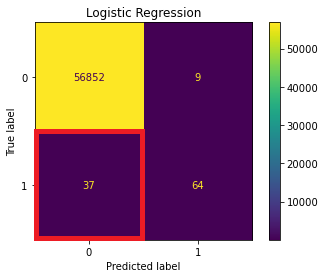

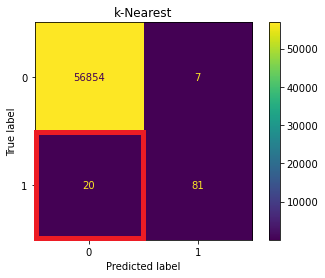

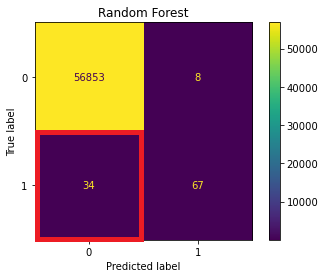

## 5. References <a id='section 5'></a>

* Cold Start Problem Notebook from Data Science Class
* Introduction to Data Science in Python Notebook from Data Science Class
* Main Idea and many code parts adapted from: https://medium.com/codex/credit-card-fraud-detection-with-machine-learning-in-python-ac7281991d87 
* Standardization idea: https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832
* Naming Confusion matrix: https://youtu.be/87Zebzxzh-A?t=365
* Classification report idea: https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets
* Advantages/Disadvantages of logistic regression: https://www.geeksforgeeks.org/advantages-and-disadvantages-of-logistic-regression/
* Advantages/Disadvantages of k-nearest neighbor: https://www.researchgate.net/profile/Mohammad_Bolandraftar/publication/304826093_Application_of_K-nearest_neighbor_KNN_approach_for_predicting_economic_events_theoretical_background/links/5a296efba6fdccfbbf816edf/Application-of-K-nearest-neighbor-KNN-approach-for-predicting-economic-events-theoretical-background.pdf
* Advantages/Disadvantages random forests: https://www.mygreatlearning.com/blog/random-forest-algorithm/